### Caso do Titanic 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('./train.csv')

In [3]:
dados.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


PassengerId: Número de identificação do passageiro; <br>
Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;<br>
Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;<br>
Name: Nome do passageiro;<br>
Sex: Sexo do passageiro;<br>
Age: Idade do passageiro em anos;<br>
SibSp: Quantidade de irmãos e cônjuges a bordo ;<br>
Parch: Quantidade de pais e filhos a bordo;<br>
Ticket: Número da passagem;<br>
Fare: Preço da passagem;<br>
Cabin: Número da cabine do passageiro;<br>
Embarked: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.

# Analisar quais Dados são irrelevantes

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b90af0d68>,
      dtype=object)

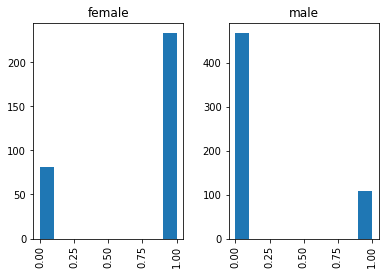

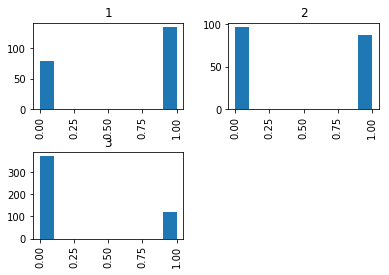

In [5]:
# todas as Pessoas
dados.hist(column = 'Survived',by = 'Sex')
dados.hist(column = 'Survived',by = 'Pclass')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b9086d588>,
      dtype=object)

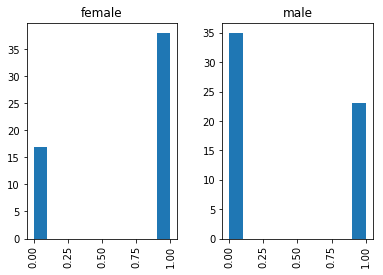

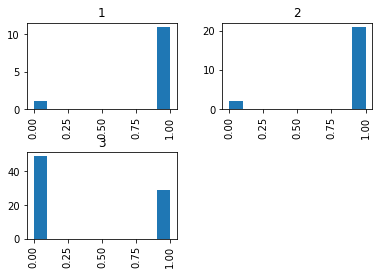

In [6]:
# somente as Crianças
dados[dados['Age'] < 18].hist(column = 'Survived',by = 'Sex')
dados[dados['Age'] < 18].hist(column = 'Survived',by = 'Pclass')

- Sobreviveram mais meninas que meninos.
- Classe 3 morreram muitas crianças.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b9098b940>,
      dtype=object)

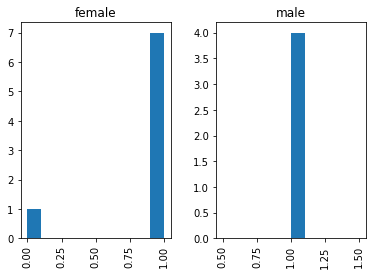

In [7]:
# Crianças da Primeira Classe

dados[(dados['Age'] < 18) & (dados['Pclass'] == 1)].hist('Survived', by = 'Sex')

- Todos meninos da primeira classe sobriviveram

- ### Até o momento foi notato que a classe, idade e sexo fazem muita diferença em quem viveu

Agora vamos ver de uma maneira mais geral, só que antes, é necessário transformar female = 1 e male = 0

In [8]:
def sex(x):
    if x.lower() == 'male':
        return 0
    elif x.lower() == 'female':
        return 1
        

In [9]:
dados['Sex'] = dados['Sex'].apply(sex)

In [10]:
dados.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Feito isto, vamos ver de uma maneira geral as relações entre os dados

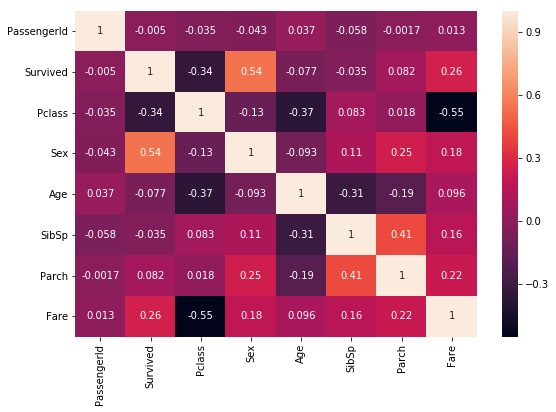

In [11]:
plt.figure(figsize=(9,6))
sns.heatmap(dados.corr(),annot = True)

De acordo com o Gráfico acima, as principais colunas que se relacionam com os sobreviventes são:
- Sex
- Pclass

Verificar:
- Fare (Parece que o preço da passagem também influenciou... verificar)
- Age (parece não influenciar no número de sobreviventes... mas o ditado era, "Mulheres e Crianças primeiro")

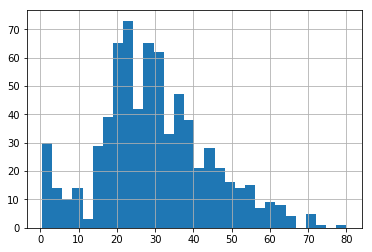

In [12]:
dados['Age'].hist(bins = 30)
# quantidade entre 18 a 40 anos é alta

# ou seja, temos poucas crianças

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b90865b38>,
      dtype=object)

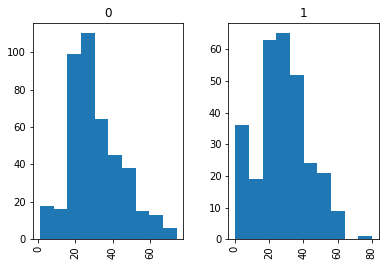

In [13]:
dados.hist(column = 'Age',by = 'Survived')

Até o momento deu para observar que:
- As crianças soreviveram em grande maioria
- Pessoas entre 20 e 30 anos estão em equilíbrio
- Se você é idoso... morreu praticamente

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b90b969e8>,
      dtype=object)

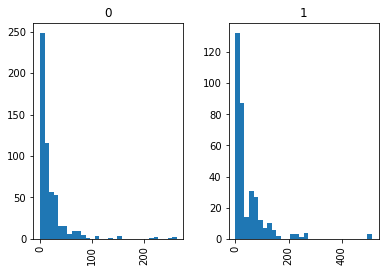

In [14]:
dados.hist(column = 'Fare', by= 'Survived', bins= 30)

# Não temos uma tendência... veja que o valor pago na passagem não influenciou nas
# sobrevivência... muita gente que pagou barato sobreviveu e muita gente que pagou caro sobreviveu...

Continuar a verificação:
- Age ->"parece existir valores nulos... ou seja, precisamos ter uma noção se é jovem ou não"

Não é interessante fazer uma média, pois existem pessoas com idade muito avançada, e apesar disso as idades média ficaria entre 30 anos (devido a quantidade de pessoas)... logo nessa faixa de 30 anos as pessoas tem praticamente o dobro de chance de morrer...

O certo seria tentar identificar se alguém é velho ou novo... pois se for velho (grande chance de não sobreviver) se for novo (grande chance de morrer)

para isso, vamos analisar a relação de:

- SibSp: Quantidade de irmãos e conjuges 
- Parch: filhos a bordo e pais

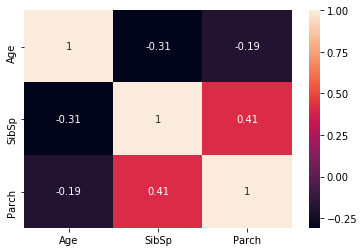

In [15]:
sns.heatmap(dados[['Age', 'SibSp', 'Parch']].corr(),annot = True)

Idade tem relação com quantidade de irmão... quantidade de irmão tem relação com Pais

In [16]:
kid = dados[dados['Age'] < 18]
old = dados[dados['Age'] > 60]

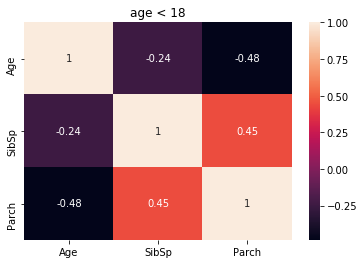

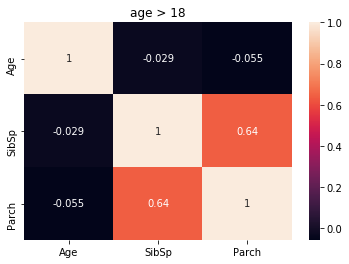

In [17]:
sns.heatmap(kid[['Age', 'SibSp', 'Parch']].corr(),annot = True)
plt.title('age < 18')
plt.figure()
plt.title('age > 18')
sns.heatmap(old[['Age', 'SibSp', 'Parch']].corr(),annot = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b90435c88>,
      dtype=object)

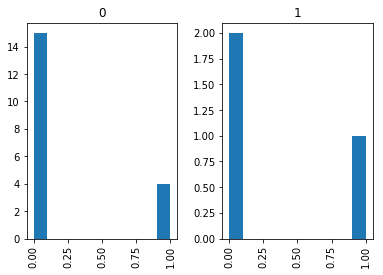

In [18]:
old.hist(column= 'Survived', by = 'SibSp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b90209898>,
      dtype=object)

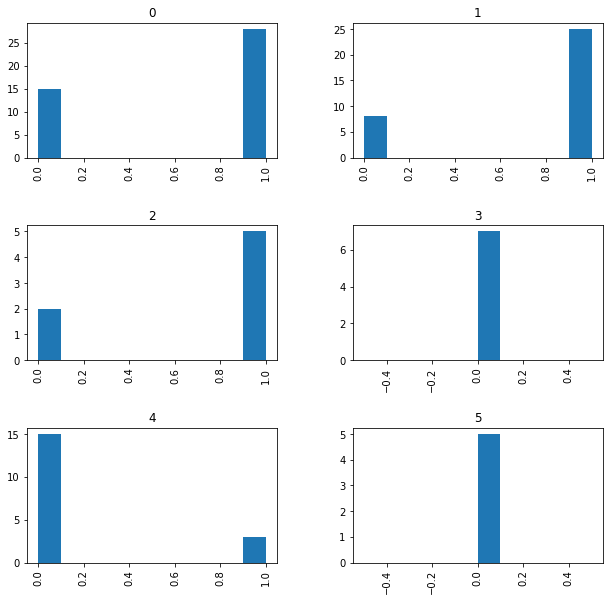

In [19]:

kid.hist(column= 'Survived', by = 'SibSp', figsize = (10,10))

Melhor será retirar as pessoas que não tem idade, pois como não temos como adivinhar qual idade elas têm, seria errado introduzir uma média.


1-) Utilizar as colunas do nosso interesse

In [20]:
#dados = dados[['Survived','Sex','Age','Pclass']] # Chegamos a uns 85% de acerto

In [21]:
dados = dados[['Survived','Sex','Age']] #98%

#Transformar String em Numeros
dados = pd.get_dummies(dados)

In [22]:
dados.head()

,Survived,Sex,Age
0,0,0,22.0
1,1,1,38.0
2,1,1,26.0
3,1,1,35.0
4,0,0,35.0


2-) Trocar Nan na Age por valor Média <font color = 'red'>( Não vou fazer isso, pode mascarar as previsões)</font>

In [23]:
def media(x):
    if np.isnan(x) == True:
        return int(dados['Age'].mean())
    else:
        return x
    

In [24]:
#dados['Age']=dados['Age'].apply(media)

2-) Retirar os NaN

In [25]:
dados = dados.dropna().reset_index().drop('index',axis=1)

In [26]:
dados.head()

,Survived,Sex,Age
0,0,0,22.0
1,1,1,38.0
2,1,1,26.0
3,1,1,35.0
4,0,0,35.0


Abaixo, eu crio duas variáveis: X, que armazenará nossos features, ou seja, os dados do passageiro; e a variável y, que irá armazenar o que nós queremos prever, nesse caso, a coluna Survived, que informa se o tripulante sobreviveu ou não.

In [27]:
X = dados.drop('Survived',axis = 1)
y = dados[['Survived']]

Normalizar os dados entre 0 e 1

In [28]:
from sklearn.preprocessing import MinMaxScaler#, StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

X = scaler.fit_transform(X)
# y não precisa, é de o até 1 já

Separar os dados em Train e Test... Por que teste? Pois assim você pode testar o seu modelo em um ambiente que não foi trainado, para saber se ele consegue realmente acertar... Isso é bom, por exemplo, nos casos em que te fornecem 50% da base de dados de um determinado problema e ficam com eles 50% para avaliar se seu modelo deu certo... logo a base de test é uma forma de você ter uma pequena noção se as prediçoes conseguem acertar.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.1,
    shuffle = True,
)

O algoritmo de Árvore de Decisão funciona de forma semelhante a um fluxograma: se determinada condição for atingida, ele segue um caminho, senão, ele segue outro. A chamada “Árvore” é a toda a estrutura do fluxograma.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tree = DecisionTreeClassifier(
    max_depth=30, # número de perguntas
    random_state=0,
)

tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
tree.score(X_train,y_train)

0.822429906542056

In [33]:
tree.score(X_test,y_test)

0.75

In [34]:
tree.score(X,y)

0.8151260504201681

### Predicts

In [35]:
dados_test = pd.read_csv('./test.csv')
dados_id = dados_test['PassengerId']

In [36]:
dados_test['Sex'] = dados_test['Sex'].apply(sex)

In [37]:
dados_test = dados_test[['Sex','Age']]#98%

#Transformar String em Numeros
dados_test = pd.get_dummies(dados_test)

In [38]:
dados_test.head(2)

,Sex,Age
0,0,34.5
1,1,47.0


In [39]:
#dados_test = dados_test.dropna().reset_index().drop('index',axis=1)]
#NÃO POSSO RETIRAR...

#Então vou ter que usar a média msm
dados_test['Age']=dados_test['Age'].apply(media)


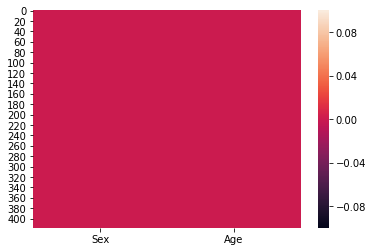

In [40]:
sns.heatmap(dados_test.isnull())

In [41]:
dados_test = scaler.fit_transform(dados_test)

In [42]:
predict = tree.predict(dados_test)

In [43]:
dados_env = pd.DataFrame()
dados_env['PassengerId']= dados_id
dados_env['Survived'] = predict

In [44]:
dados_env.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [45]:
dados_env.tail()

,PassengerId,Survived
413,1305,0
414,1306,0
415,1307,0
416,1308,0
417,1309,0


In [46]:
dados_env.to_csv('./Titanic_Predictions_tree.csv',index=False)